<a href="https://colab.research.google.com/github/Linkonb/Employee_Turnover_Prediction/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Employee Turnover Prediction**

In RMG sector the turnover of worker is very High then other Industry . AS a result the HR department and production also faceing problem to reduce the turnover ratio.

In this Project we develop a model to prediction turnover of different Department according their Department, Designation , Gender, Age etc

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

BDS


In [ ]:
age_ranges = [(18, 24), (25, 29),(30, 34), (35, 40), (43, 55), (56, 64), (65, 80)]
# Create a function to categorize ages into the specified age ranges
def categorize_age(age):
    for min_age, max_age in age_ranges:
        if min_age <= age <= max_age:
            return f"{max_age}-{min_age}"
    return "80+"



Current_Gross_ranges = [(0, 10000), (10001, 12000),(12001, 15000), (15001, 18000), (18001, 21000), (21001, 24000), (24001, 27000)]
# Create a function to categorize ages into the specified age ranges
def categorize_Gross_ranges(Current_Gross):
    for min_ranges, max_ranges in Current_Gross_ranges:
        if min_ranges <= Current_Gross <= max_ranges:
            return f"{max_ranges}-{min_ranges}"
    return "27001"


# Use a conditional check to handle invalid date values
def safe_date_conversion(date_str):
    try:
        return pd.to_datetime(date_str, format=left_date_format)
    except ValueError:
        return np.nan


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emp_model_data.csv', low_memory=False, encoding='cp1252')
 #emp_model_data_Year1

In [ ]:
print(data.head(2))

   RegId  ComID EmployeeCode                 Name       BirthDate  \
0   1821      1        10795  PARVIN AKTER FATEMA   2/3/1989 0:00   
1   1822      1        10796         LABONI BEGUM  6/13/1992 0:00   

      JoiningDate Department    Section Designation Bus_Availer  ...  \
0  6/14/2011 0:00     SEWING  SEWING 01    OPERATOR          No  ...   
1  6/16/2011 0:00     SEWING  SEWING 01      HELPER          No  ...   

  Current_Gross   District     Sex MLeft        Left_Date WStatus JoinYear  \
0          5300  PIROJPUR   Female     1  10/11/2011 0:00       W       22   
1          3350   BAGERHAT  Female     1  12/28/2011 0:00       W       19   

   AgeWhenLeft WorkingDuration WorkingDurationYear  
0         22.0               4                   0  
1         19.0               6                   0  

[2 rows x 24 columns]
Total data: 282949


In [ ]:
print('Total data:',data['Department'].count())

Total data: 282949


In [ ]:
data.groupby(['Department'])['Department'].count()

Department
ACCOUNTS & FINANCE      138
ADMIN                     1
ADMIN (BOD)               1
ADMIN (CORPORATE)         1
ADMINSTRATION            11
                      ...  
UJL-01                  923
UJL-03                  229
UQ SPECIAL TEAM          18
WATER MANAGEMENT         40
WET PROCESSING        56519
Name: Department, Length: 72, dtype: int64

In [ ]:
# Define a custom date parsing format for the 'LeftDate' column
left_date_format = '%m/%d/%Y'  # Replace with your actual date format

data['JoiningDate'] = data['JoiningDate'].apply(safe_date_conversion)

In [ ]:
#filtered_df = df.query('age > 25 and gender == 'Male'')
#data= data.query('ComID == 7 and WStatus == "F" and WorkingDuration >0 and Corporate_Emp=="Yes" and WStatus  in ("W","F")')

#data= data.query('ComID == 7 and WStatus == "J"  ')
#data= data.query('Department == "SEWING" and WStatus == "W" ')
#data= data.query('ComID == 7 and JoiningDate. >= '01-01-2015'' )
# df.country.isin(countries_to_keep)  and Department == "SEWING"

data= data.query('MLeft == 1')

#data= data.query(' ComID  in (1,5,7)   and Department == "SEWING2" and  WorkingDuration > 1 ')
#data= data.query(' ComID  in (1,5,7)   and  WorkingDuration > 1 ')

data = data[['RegId','ComID','Department','Section','Designation','Designation_Category','Current_Gross','District','Sex','Marital_Status','Last_Education','Bus_Availer','MLeft','Left_Date','WStatus','JoinYear','AgeWhenLeft','WorkingDuration','WorkingDurationYear']]



print('Filter data:',data['Department'].count())
#print(data.head())


#if data['Department'].count() == 0 :
    ##sys.exit(0)
# Apply the categorize_age function to create an 'AgeRange' column
#data['JoinYear'] = data['JoinYear'].apply(categorize_age)
#data['Current_Gross'] = data['Current_Gross'].apply(categorize_Gross_ranges)



Filter data: 246959


<Axes: title={'center': 'left Employees in different Department'}, xlabel='Department'>

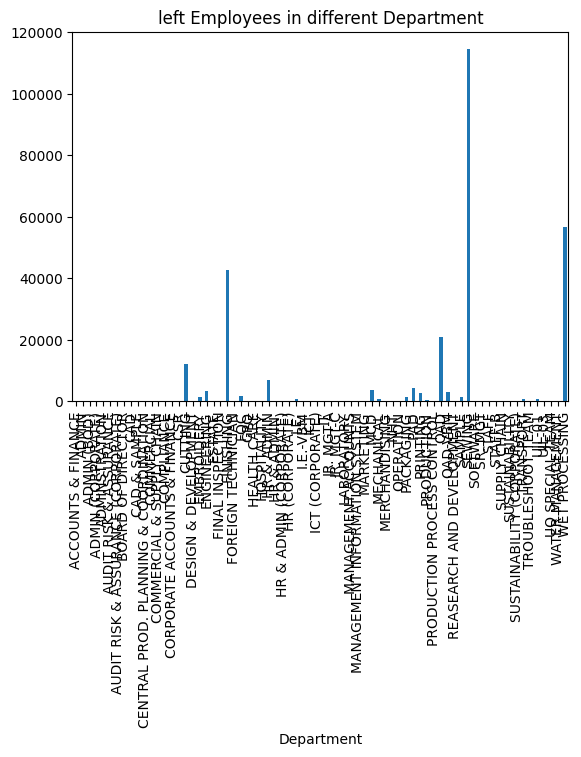

In [ ]:
data.groupby(['Department'])['Department'].count().plot(x='Department',
        kind='bar',
        stacked=False,
        title='left Employees in different Department')

<ipython-input-17-daa704f364c8>:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
<ipython-input-17-daa704f364c8>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


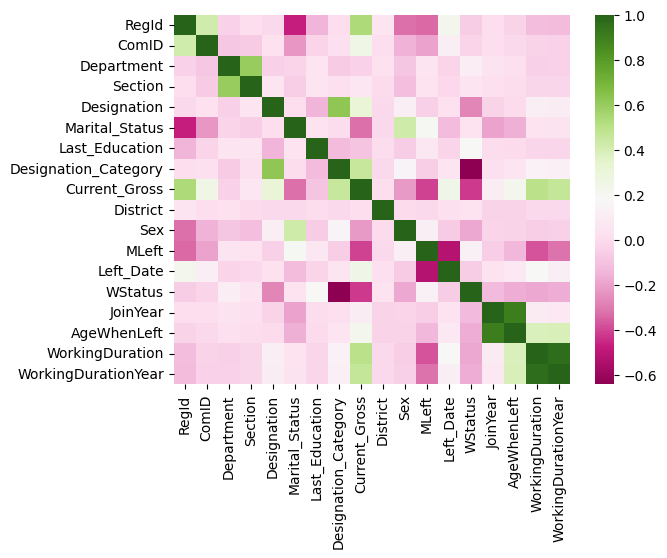

In [ ]:
# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()



data['Department'] = lableencoder_X_2.fit_transform(data['Department'])
data['Section'] = lableencoder_X_2.fit_transform(data['Section'])
data['Designation'] = lableencoder_X_2.fit_transform(data['Designation'])
data['Designation_Category'] = lableencoder_X_2.fit_transform(data['Designation_Category'])
data['Current_Gross'] = lableencoder_X_2.fit_transform(data['Current_Gross'])



data['District'] = lableencoder_X_2.fit_transform(data['District'])
data['Sex'] = lableencoder_X_2.fit_transform(data['Sex'])
data['Marital_Status'] = lableencoder_X_2.fit_transform(data['Marital_Status'])
data['Last_Education'] = lableencoder_X_2.fit_transform(data['Last_Education'])
data['MLeft'] = lableencoder_X_2.fit_transform(data['MLeft'])
data['Left_Date'] = lableencoder_X_2.fit_transform(data['Left_Date'])


data['WStatus'] = lableencoder_X_2.fit_transform(data['WStatus'])
data['JoinYear'] = lableencoder_X_2.fit_transform(data['JoinYear'])
data['AgeWhenLeft'] = lableencoder_X_2.fit_transform(data['AgeWhenLeft'])
data['WorkingDuration'] = lableencoder_X_2.fit_transform(data['WorkingDuration'])
data['WorkingDurationYear'] = lableencoder_X_2.fit_transform(data['WorkingDurationYear'])


data.fillna(data.mean(), inplace=True)


#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="PiYG")
#print(corr)
plt.show()





In [ ]:

#x = data[['ComID','Department','Section','Designation_Category','WStatus','Sex','Marital_Status','JoinYear' ,'AgeWhenLeft','Current_Gross'] ]  #33
#y = data['WorkingDuration']  #86.50%


x = data[['RegId','ComID','Department','Section','Designation_Category','WStatus','Sex','Marital_Status','AgeWhenLeft' ,'Current_Gross'] ]  #33
y = data['WorkingDuration']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)


#pass

# Create a decision tree regressor model
model = DecisionTreeRegressor(random_state=10)
#model = DecisionTreeClassifier(random_state=0)


# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


#cm= confusion_matrix(y_test, y_pred)
#print(cm)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:

#print(y_pred.count())
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')




# some time later...

 # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(result)

Mean Squared Error: 71.77729084791767
R-squared (R2) Score: 0.871906255040189
0.871906255040189
